In [ ]:
#paper on models is here: https://arxiv.org/pdf/1210.7111.pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.stats import norm

In [2]:
# 1st model
def phi1(u):
    if u>0:
        return (1-np.exp(-u))/u;
    if u==0:
        return 1;

In [3]:
def psi1(z):
    return abs(z)+0.5*(1+np.power(1+abs(z),0.5));

In [4]:
def var1(t,k):
    return t*psi1(k*phi1(t));

In [5]:
#creating mesh

k = np.arange(-5, 5, 0.25)
t = np.arange(0.1, 5, 0.1)
k, t = np.meshgrid(k, t)
x=k.shape[0]
y=k.shape[1]

In [6]:
#total variance
w=np.zeros((x,y))
for i in range(x):
    for j in range(y):
        w[i,j]=var1(t[i,j],k[i,j])

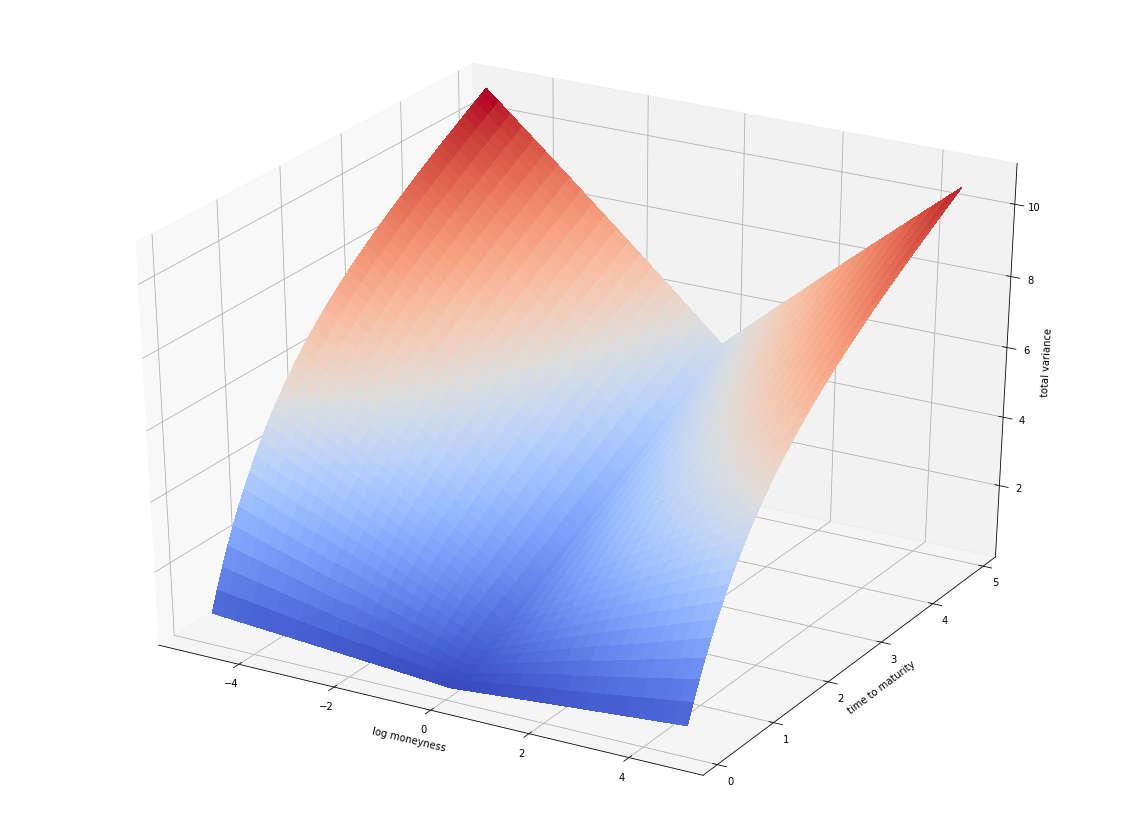

In [7]:
#plot
fig = plt.figure(figsize=(20,15))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(k, t, w,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('log moneyness')
ax.set_ylabel('time to maturity')
ax.set_zlabel('total variance')

plt.show()

In [8]:
#implied vol
sigma=np.zeros((x,y))
for i in range(x):
    for j in range(y):
        sigma[i,j]=np.power(w[i,j]/t[i,j],0.5)

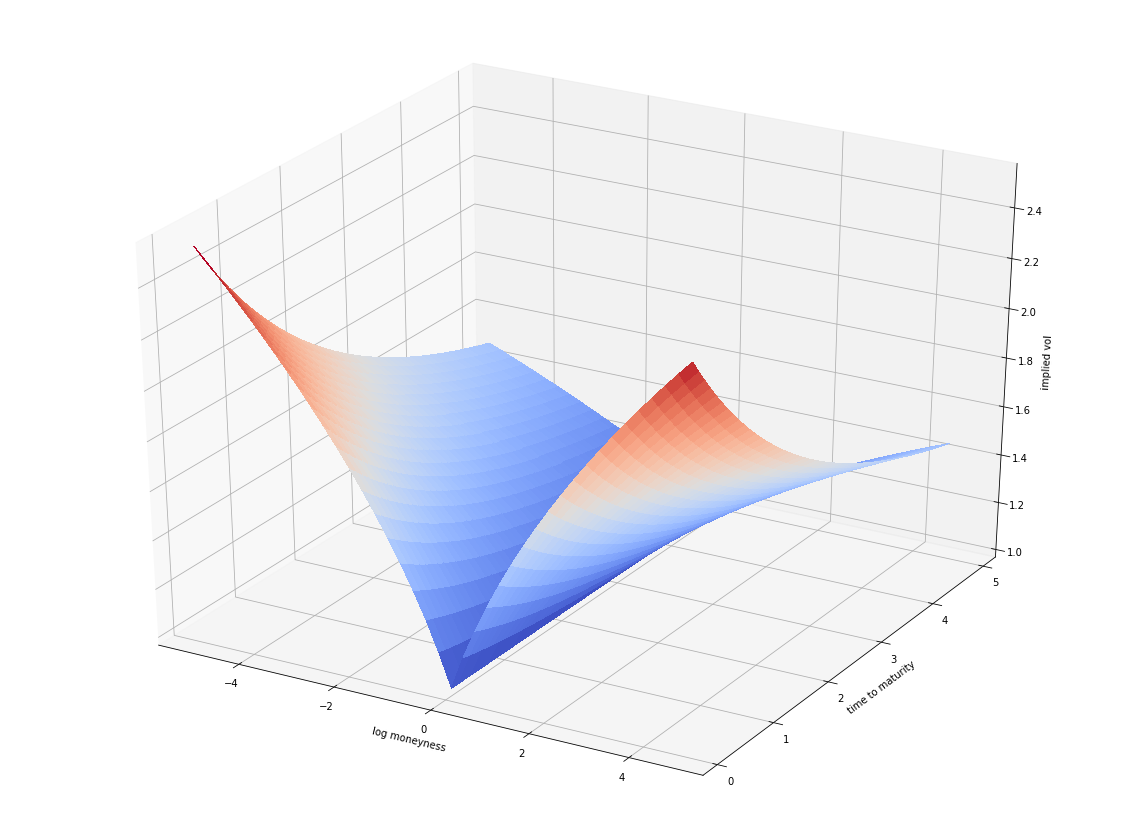

In [9]:
fig = plt.figure(figsize=(20,15))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(k, t, sigma,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('log moneyness')
ax.set_ylabel('time to maturity')
ax.set_zlabel('implied vol')

plt.show()

In [10]:
#call price
def d1(k,sigma,r,t):
    return (k+(r+np.power(sigma,2)/2)*t)/(sigma*np.power(t,0.5));

In [11]:
def d2(k,sigma,r,t):
    return d1(k,sigma,r,t)-sigma*np.power(t,0.5);

In [13]:
S0=1
r=0.05
C=np.zeros((x,y))
for i in range(x):
    for j in range(y):
        K=S0/np.exp(k[i,j])
        C[i,j]=S0*norm.cdf(d1(k[i,j],sigma[i,j],r,t[i,j]))-norm.cdf(d2(k[i,j],sigma[i,j],r,t[i,j]))*K*np.exp(-r*t[i,j])



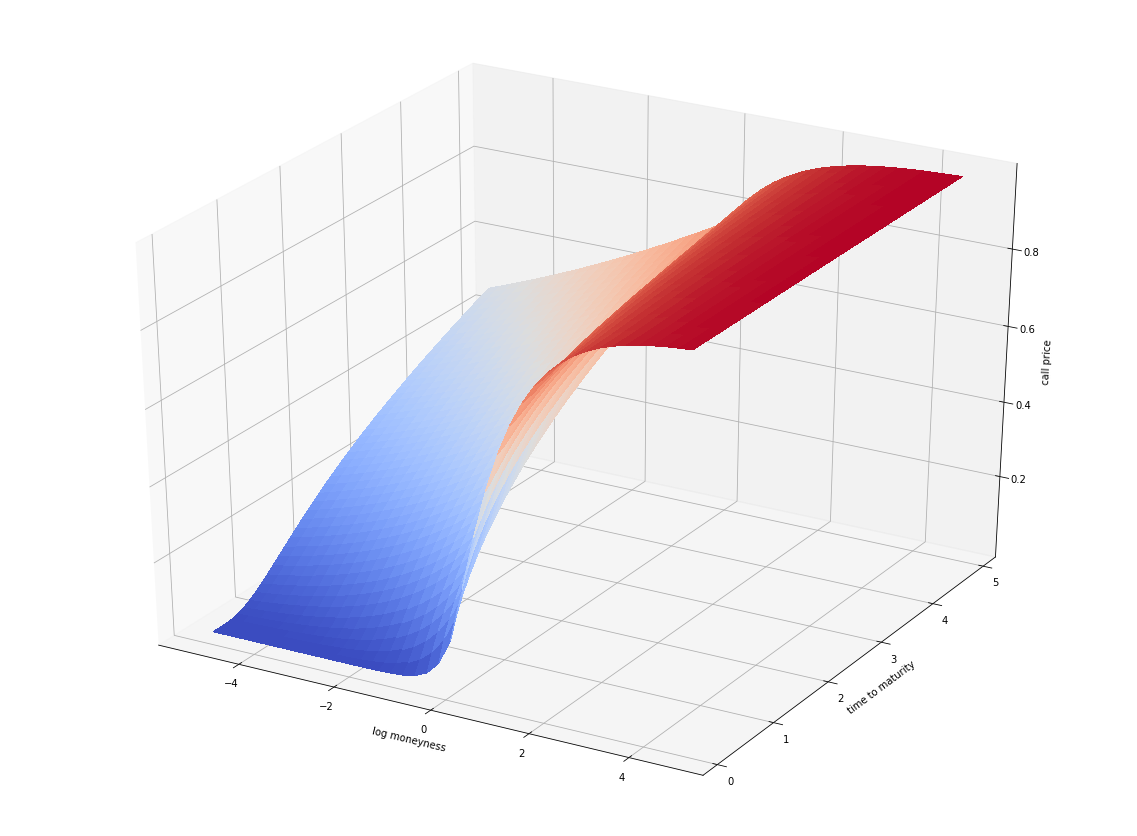

In [14]:
fig = plt.figure(figsize=(20,15))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(k, t, C,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('log moneyness')
ax.set_ylabel('time to maturity')
ax.set_zlabel('call price')
plt.show()

In [ ]:
#tried to reproduce L operator surface from paper

#L operator
def dk(k,t):
    e=np.exp(-t)
    return (1-e)*(1+(t/(k*(1-e)+t))**0.5)/4;

In [ ]:
def dkk(k,t):
    e=np.exp(-t)
    return -(t**0.5)*((1-e)**2)*((k*(1-e)+t)**-1.5)/8;

In [ ]:
def L(k,t,w):
    d_k=dk(k,t)
    d_kk=dkk(k,t)
    a=(1-(k*d_k)/(2*w))**2
    b=(d_k**2)/4
    c=((1/w)+0.25)
    d=d_kk/2
    return a-b*c+d;

In [ ]:
Lw=np.zeros((x,y))
for i in range(x):
    for j in range(y):
        Lw[i,j]=L(k[i,j],t[i,j],w[i,j])

In [ ]:
fig = plt.figure(figsize=(20,15))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(k, t, Lw,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('log moneyness')
ax.set_ylabel('time to maturity')
ax.set_zlabel('L variance')
plt.show()

In [ ]:
Lw

In [15]:
#2nd model

def phi2(u,alpha):
    if u>0:
        return alpha*(1-np.exp(-u))/u;
    if u==0:
        return alpha;

In [16]:
def psi2(z,v):
    return np.power((1+np.power(abs(z),v)),1/v);


In [17]:
def var2(t,k,alpha,v):
    return t*psi2(k*phi2(t,alpha),v);

In [18]:
# total variance, please set alpha and v
w2=np.zeros((x,y))
alpha=0.5
v=10
for i in range(x):
    for j in range(y):
        w2[i,j]=var2(t[i,j],k[i,j],alpha,v)

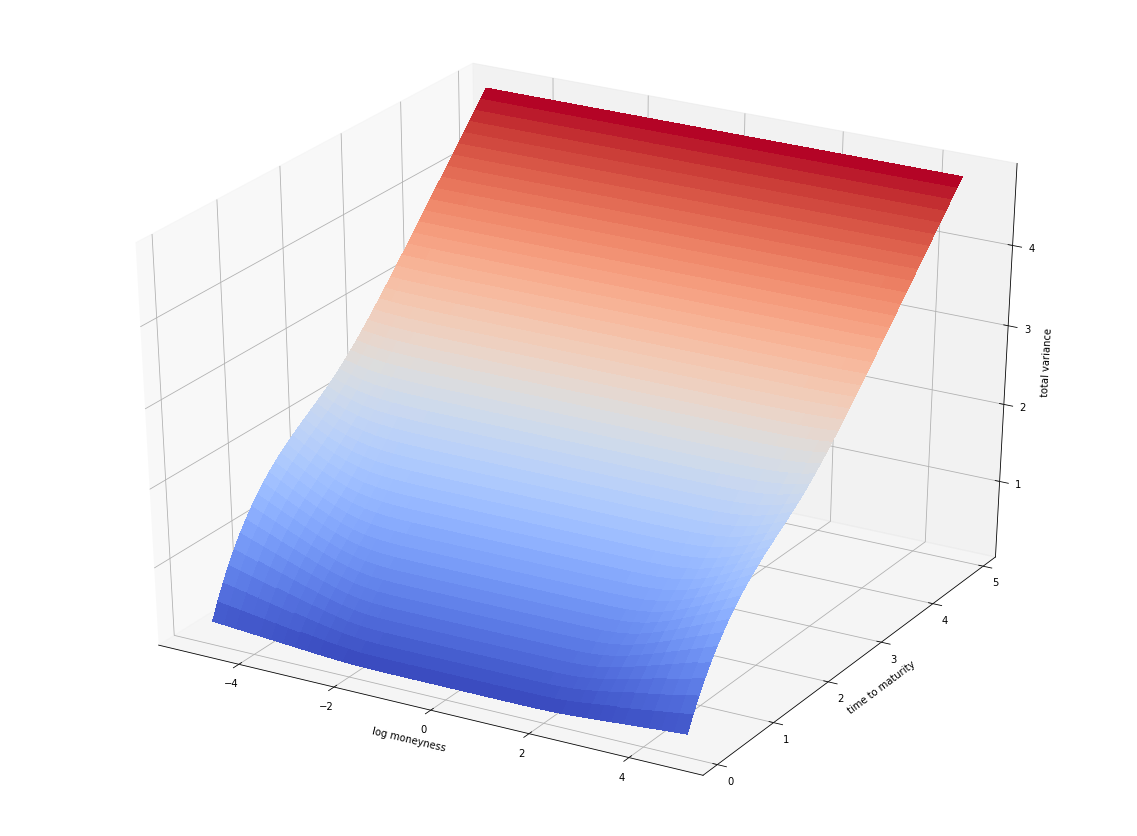

In [19]:
fig = plt.figure(figsize=(20,15))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(k, t, w2,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('log moneyness')
ax.set_ylabel('time to maturity')
ax.set_zlabel('total variance')
plt.show()

In [20]:
#implied vol
sigma2=np.zeros((x,y))
for i in range(x):
    for j in range(y):
        sigma2[i,j]=np.power(w2[i,j]/t[i,j],0.5)


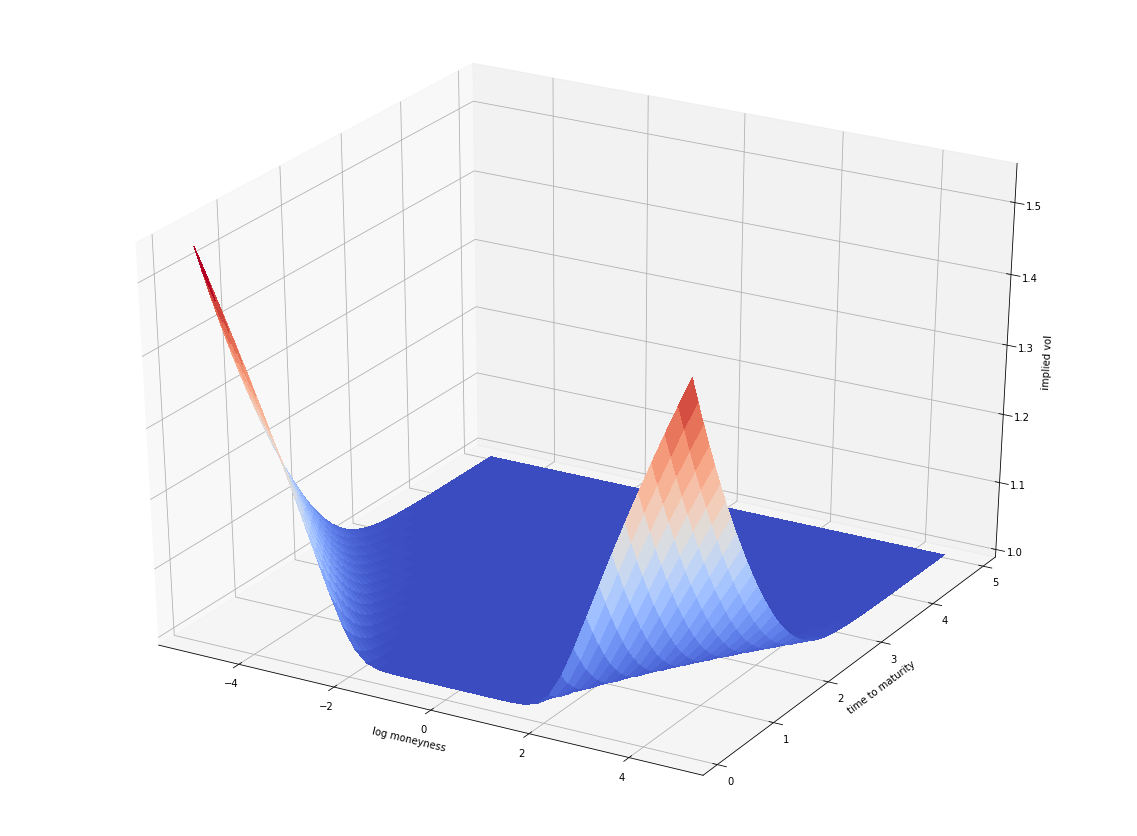

In [21]:
fig = plt.figure(figsize=(20,15))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(k, t, sigma2,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('log moneyness')
ax.set_ylabel('time to maturity')
ax.set_zlabel('implied vol')
plt.show()